# Validation Metrics for Classification - Exercise notebook

In [1]:
import pandas as pd
import math 
import numpy as np
from utils import show_confusion_matrix, hash_answer
from matplotlib import pyplot as plt 
data = pd.read_csv('data/classifier_prediction_scores.csv').rename(columns={'scores': 'probas'})

In this notebook the following is tested:

- Understanding the problem with accuracy
- Understanding FP, TP, FN, TN
- Understanding precision, recall
- Understanding the ROC Curve 
- Understanding AUROC
- Which model is better for a particular circumstance
- Using these metrics in day to day 


## Useful information

In this exercise we have the following dataset: 

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>probas</th>      <th>target</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>0.288467</td>      <td>0</td>    </tr>    <tr>      <th>1</th>      <td>0.255047</td>      <td>1</td>    </tr>    <tr>      <th>2</th>      <td>0.201017</td>      <td>0</td>    </tr>    <tr>      <th>3</th>      <td>0.729307</td>      <td>1</td>    </tr>    <tr>      <th>4</th>      <td>0.148288</td>      <td>0</td>    </tr>  </tbody></table>

# Exercise 1 - Understanding the problem with Accuracy 

Do the following steps without using scikit: 

1. Create a column called "predicted at 0.5 threshold", which will be:
> 0 if probas is smaller than 0.5  
> 1 otherwise (larger or equal to 0.5)   
2. Calculate the accuracy of the predictions (feel free to use a support column called "correct prediction")
3. Calculate what the accuracy would have been if you had simply predicted 0 every time 

In [2]:
def threshold_probas(proba, threshold=.5): 
    if proba >= threshold:
        return 1
    else: 
        return 0 

def accuracy_analysis(df):
    df = df.copy()
    
    df["predicted_at_0.5_threshold"] =df.probas.map(threshold_probas)
    # hint: use the function you just calculated 
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    df['correct_prediction'] = df['target']==df['predicted_at_0.5_threshold']
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    accuracy_predictions = df['correct_prediction'].sum()/df.shape[0]
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    df['n_correct_zero'] = df['target']==0
    accuracy_predicting_always_zero =  df['n_correct_zero'].sum()/df.shape[0]
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return accuracy_predictions, accuracy_predicting_always_zero
    

In [3]:
results = accuracy_analysis(data)
print('Predictions accuracy:               %0.3f \nAccuracy of predicting always zero: %0.3f' % (results))

Predictions accuracy:               0.830 
Accuracy of predicting always zero: 0.834


Expected output: 

```
Predictions accuracy:               0.830 
Accuracy of predicting always zero: 0.834
```

In [4]:
assert isinstance(results[0], float)
assert isinstance(results[1], float)
assert math.isclose(results[1] - results[0], 0.00319, abs_tol=.04)

# Exercise 2: Understanding main metrics at a particular threshold 

For the following confusion matrix, without using scikit, calculate (manually) the number of 
- False Positives    (FP)
- True Positives     (TP)
- False Negatives    (FN)
- True Negatives     (TN)

along with the 
- True Positive Rate  (TPR)
- False Positive Rate (FPR)
- Recall
- Precision

Note: you can hardcode the number in this one :) 

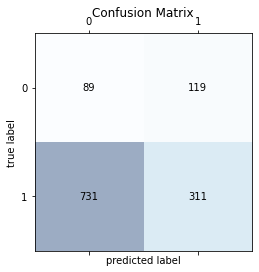

In [5]:
show_confusion_matrix()

In [6]:
def my_confusion_matrix_analysis():
    true_positives = 311
    # YOUR CODE HERE
    #raise NotImplementedError()

    true_negatives = 89
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    false_positives = 119
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    false_negatives = 731
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    false_positive_rate =false_positives/(true_negatives+false_positives)  
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    true_positive_rate = true_positives/(true_positives+false_negatives)
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    precision = true_positives/(true_positives+false_positives)
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    recall = true_positives/(true_positives+false_negatives)
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return true_positives, true_negatives, false_positives, false_negatives, \
           false_positive_rate, true_positive_rate, precision, recall 

In [7]:
TP, TN, FP, FN, FPR, TPR, precision, recall = my_confusion_matrix_analysis()

print('True Positives:       %0.0f' % TP)
print('True Negatives:       %0.0f' % TN)
print('False Positives:      %0.0f' % FP)
print('False Negatives:      %0.0f' % FN)
print('False Positive rate:  %0.2f' % FPR)
print('True Positive rate:   %0.2f' % TPR)
print('precision:            %0.2f' % precision)
print('recall:               %0.2f' % recall)


True Positives:       311
True Negatives:       89
False Positives:      119
False Negatives:      731
False Positive rate:  0.57
True Positive rate:   0.30
precision:            0.72
recall:               0.30


Expected output: 

    True Positives:       <not telling you!>
    True Negatives:       <not telling you!>
    False Positives:      <not telling you!>
    False Negatives:      <not telling you!>
    False Positive rate:  0.57
    True Positive rate:   0.30
    precision:            0.72
    recall:               0.30
    
_Note: your `True Positive Rate` and `Recall` should be the same because... ehm... (check their formula!)_

In [8]:
assert hash_answer(TP) == '20e9c64c05a54d199610fb7e38135361324b5ed5dcf39c23afe9b48926c07376'
assert hash_answer(TN) == 'cd70bea023f752a0564abb6ed08d42c1440f2e33e29914e55e0be1595e24f45a'
assert hash_answer(FP) == '3038bfb575bee6a0e61945eff8784835bb2c720634e42734678c083994b7f018'
assert hash_answer(FN) == 'f24f1a64b591544a871284bdde332d3c5d2cb109d21c03122c57d768e7c535b1'
assert math.isclose(FPR, 0.572, abs_tol=0.01)
assert math.isclose(TPR, 0.298, abs_tol=0.01)
assert math.isclose(precision, 0.723, abs_tol=0.01)
assert math.isclose(recall, 0.298, abs_tol=0.01)

# Exercise 3: model selection 

Consider the following two confusion matrixes: 

<img src="data/conf_mats.png" alt="drawing" width="600"/> 

In [9]:
# which option (A or B) is better if you are evaluating the performance of a judge over his career? 
# In this situation: 
# - 1 is guilty
# - 0 is innocent 
# - predicting 1 sends people to jail
# - predicting 0 sends people home free

best_option_for_a_judge ="B"
# YOUR CODE HERE
#raise NotImplementedError()

# which option (A or B) is best, if this is a model for screening for cancer? 
# In this situation: 
# - 1 is cancer
# - 0 is healthy
# - predicting 1 sends people to a cancer screening
# - predicting 0 sends people home 

best_option_for_cancer_screening ="A"
# YOUR CODE HERE
#raise NotImplementedError()

In [10]:
assert hash_answer(best_option_for_cancer_screening.lower()) == 'ca978112ca1bbdcafac231b39a23dc4da786eff8147c4e72b9807785afee48bb'
assert hash_answer(best_option_for_a_judge.lower()) == '3e23e8160039594a33894f6564e1b1348bbd7a0088d42c4acb73eeaed59c009d'

# Exercise 4: Understanding the ROC Curve 

In [11]:
# for your convenience, we have already written most of this.
# most of this exercise is understanding what is going on, and completing the last functions :)

def threshold_probas(proba, threshold): 
    # returns the thresholded prediction for a single observation 
    # -----------------------------------------------------
    # inputs: 
    #     proba (float): a scores or probability, between 0.0 and 1.0
    #     threshold (float): a number between 0.0 and 1.0    
    # -----------------------------------------------------
    # example: threshold_probas(.9, .5) = 1
    if proba >= threshold:
        return 1
    else: 
        return 0 
    
def get_predictions(probas, threshold):
    # returns the thresholded predictions 
    # -----------------------------------------------------
    # inputs: 
    #     probas (pd.Series): a series of floats (scores or probabilities) between 0.0 and 1.0
    #     threshold (float): a number between 0.0 and 1.0    
    # -----------------------------------------------------
    # example: get_predictions([.1, .2, .5], .4) = [0, 0, 1]
    # -----------------------------------------------------
    return probas.map(lambda x: threshold_probas(x, threshold))

def calculate_number_of_true_positives(predictions, target):
    # calculates the number of true positives 
    # -----------------------------------------------------
    # inputs: 
    #     predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
    #     target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    # -----------------------------------------------------
    # example: calculate_number_of_true_positives([[0, 1, 0]], [0, 1, 1]) = 1 
    # -----------------------------------------------------
    positive_predictions_indexes = (predictions == 1)
    true_positives = predictions.loc[positive_predictions_indexes] == target[positive_predictions_indexes]
    return true_positives.sum()
    
def calculate_number_of_false_positives(predictions, target): 
    # calculates the number of false positives 
    # -----------------------------------------------------
    # inputs: 
    #     predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
    #     target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    # -----------------------------------------------------
    # example: calculate_number_of_false_positives([[0, 1, 0]], [0, 1, 1]) = 0
    # -----------------------------------------------------
    positive_predictions_indexes = (predictions == 1)
    false_positives = predictions.loc[positive_predictions_indexes] != target[positive_predictions_indexes]
    return false_positives.sum()
    
def calculate_number_of_true_negatives(predictions, target): 
    # calculates the number of true_negatives
    # -----------------------------------------------------
    # inputs: 
    #     predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
    #     target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    # -----------------------------------------------------
    # example: calculate_number_of_true_negatives([[0, 1, 0]], [0, 1, 1]) = 1 
    # -----------------------------------------------------
    negative_predictions_indexes = (predictions == 0)
    true_negatives = predictions.loc[negative_predictions_indexes] == target[negative_predictions_indexes]
    return true_negatives.sum()

def calculate_number_of_false_negatives(predictions, target): 
    # calculates the number of false_negatives
    # -----------------------------------------------------
    # inputs: 
    #     predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
    #     target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    # -----------------------------------------------------
    # example: calculate_number_of_false_negatives([[0, 1, 0]], [0, 1, 1]) = 1 
    # -----------------------------------------------------
    negative_predictions_indexes = (predictions == 0)
    false_negatives = predictions.loc[negative_predictions_indexes] != target[negative_predictions_indexes]
    return false_negatives.sum()

def calculate_true_positives_rate(predictions, target):
    # calculate the true positive rate
    # hint: we have defined most things above, so 2 of the lines are just function calls 
    FN = calculate_number_of_false_negatives(predictions, target)
    TP = calculate_number_of_true_positives(predictions, target)
    true_positive_rate =float(TP/(TP+FN))
    # YOUR CODE HERE
    
    #raise NotImplementedError()
    
    return true_positive_rate

def calculate_false_positives_rate(predictions, target):
    # calculate the false positive rate 
    # hint: we have defined most things above, so 2 of the lines are just function calls 
    FP = calculate_number_of_false_positives(predictions, target)
    TN =calculate_number_of_true_negatives(predictions, target)
    false_positive_rate = float(FP/(TN+FP)) 
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return false_positive_rate

def hand_made_roc_curve(probas, target, list_of_thresholds):
    
    TPRs = {}
    FPRs = {}
    
    # for each threshold, get the predictions, and calculate the TPR and FPR
    # hint: you already defined everything above, so each line should be just a function call   
    for threshold in list_of_thresholds:
        predictions = get_predictions(probas, threshold)
        TPRs[threshold] = calculate_true_positives_rate(predictions, target)
        FPRs[threshold] = calculate_false_positives_rate(predictions, target)
        # YOUR CODE HERE
        #raise NotImplementedError()
    
    return {'True Positive Rate': TPRs, 'False Positive Rate': FPRs}

In [12]:
hand_made_roc_df

NameError: name 'hand_made_roc_df' is not defined

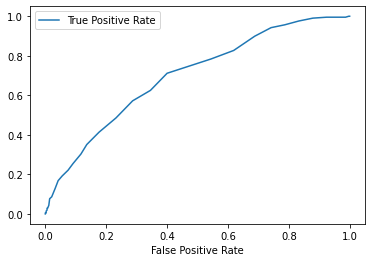

,False Positive Rate,True Positive Rate
Thresholds,,
0.041649,0.964491,0.995192
0.050396,0.924184,0.995192
0.059975,0.879079,0.990385
0.070387,0.833013,0.975962
0.081633,0.786948,0.956731
0.093711,0.741843,0.942308
0.106622,0.688100,0.899038
0.120367,0.619002,0.826923
0.134944,0.544146,0.783654


In [13]:
# generating a space of thresholds (we'll be more "dense near zero")
list_of_thresholds = np.linspace(0, 10) ** 2 / 100

# using the function you have just created 
hand_made_roc = hand_made_roc_curve(data['probas'], data['target'], list_of_thresholds)

# just making a dataframe to pretty things up
hand_made_roc_df = pd.DataFrame({'False Positive Rate': hand_made_roc['False Positive Rate'], 
                        'True Positive Rate': hand_made_roc['True Positive Rate']})

# naming the index
hand_made_roc_df.index.name = 'Thresholds'

# plotting the ROC curve 
hand_made_roc_df.set_index('False Positive Rate').plot();
plt.show()

# displaying the ROC curve 
display(hand_made_roc_df.iloc[10:20])

Expected output: 

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>fpr</th>      <th>tpr</th>    </tr>    <tr>      <th>Thresholds</th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>0.041649</th>      <td>0.964491</td>      <td>0.995192</td>    </tr>    <tr>      <th>0.050396</th>      <td>0.924184</td>      <td>0.995192</td>    </tr>    <tr>      <th>0.059975</th>      <td>0.879079</td>      <td>0.990385</td>    </tr>    <tr>      <th>0.070387</th>      <td>0.833013</td>      <td>0.975962</td>    </tr>    <tr>      <th>0.081633</th>      <td>0.786948</td>      <td>0.956731</td>    </tr>    <tr>      <th>0.093711</th>      <td>0.741843</td>      <td>0.942308</td>    </tr>    <tr>      <th>0.106622</th>      <td>0.688100</td>      <td>0.899038</td>    </tr>    <tr>      <th>0.120367</th>      <td>0.619002</td>      <td>0.826923</td>    </tr>    <tr>      <th>0.134944</th>      <td>0.544146</td>      <td>0.783654</td>    </tr>    <tr>      <th>0.150354</th>      <td>0.467370</td>      <td>0.745192</td>    </tr>  </tbody></table>

In [14]:
hand_made_roc = hand_made_roc_curve(data['probas'], data['target'], list_of_thresholds)
hand_made_roc_df = pd.DataFrame({'False Positive Rate': hand_made_roc['False Positive Rate'], 
                        'True Positive Rate': hand_made_roc['True Positive Rate']})

assert math.isclose(hand_made_roc_df['False Positive Rate'].iloc[15], 0.741, abs_tol=.001)
assert math.isclose(hand_made_roc_df['True Positive Rate'].sum(), 23.85, abs_tol=.01)
assert hand_made_roc_df.shape == (50, 2)

# Exercise 5: Understanding AUROC (Area under the ROC Curve)

Great! You (hopefully) made a ROC curve! 

We also established that an important metric was the AUROC, which was, quite simply, the area under the curve. 

Instead of using super-sophisticated methods for calculating areas, we have just printed some rectangles on top of (your!) ROC curve and printed the heights. 

All rectangles have a side of 0.1.

<img src="data/roc_with_squares.png" alt="drawing" width="600"/>

In [ ]:
# what is the area under the ROC curve? (approximately, using the rectangles)

# approximate_area_under_the_ROC_curve = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert hash_answer(round(approximate_area_under_the_ROC_curve, 3)
                  ) == '5c97d232613ef6364a394789d9c4a3dafd98d9025602370adc753b57e8e2ae4e'

# Exercise 6: The joy of scikit 
Ok, now you (finally) get to use scikit :) 

In [15]:
df = data.iloc[0:100].copy()
df['predictions'] = get_predictions(df['probas'], threshold=.3)
display(df.head())

,probas,target,predictions
0,0.288467,0,0
1,0.255047,1,0
2,0.201017,0,0
3,0.729307,1,1
4,0.148288,0,0


In [16]:
def prediction_analysis_with_scikit(predictions, target):
    # importing the correct functions, get the accuracy, precision and recall
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    accuracy = accuracy_score(predictions, target)
    precision = precision_score(predictions, target)
    recall = recall_score(predictions, target)
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return accuracy, recall, precision

def confusion_matrix_with_scikit(predictions, target):
    from sklearn.metrics import  confusion_matrix
    # importing the correct functions, return scikit's confusion matrix
    # from ? import ...
    conf_mat = confusion_matrix(predictions, target)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return conf_mat

def get_roc_curve_data_with_scikit(probas, target):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(probas, target)
    # from ? import ... 
    # ...
    # YOUR CODE HERE
    #raise NotImplementedError()
    return fpr, tpr, thresholds


def roc_auc_with_scikit(probas, target):
    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(probas, target)
    # from ? import ... 
    # ...
    # YOUR CODE HERE
    #raise NotImplementedError()
    return roc_auc 

In [ ]:
df['probas']

In [ ]:
df['target']

In [ ]:
df['pr']

In [17]:
print(prediction_analysis_with_scikit(df['predictions'], df['target']))
print(confusion_matrix_with_scikit(df['predictions'], df['target']))

fpr_test, tpr_test, thresholds_test = get_roc_curve_data_with_scikit(df['probas'], df['target'])
print(fpr_test[20:30])
print(tpr_test[20:30])
print(thresholds_test[30:45])
print(roc_auc_with_scikit(df['probas'], df['target']))

(0.8, 0.5, 0.2)
[[76 16]
 [ 4  4]]


ValueError: continuous format is not supported

Expected output: 

    (0.8, 0.5, 0.2)
    [[76  4]
     [16  4]]
    [0.3125 0.4375 0.4375 0.5875 0.5875 0.6125 0.6125 0.65   0.65   0.725 ]
    [0.7  0.7  0.75 0.75 0.8  0.8  0.85 0.85 0.9  0.9 ]
    [0.08661403 0.03556623 0.02952571 0.01969409]
    0.7024999999999999

In [ ]:
df.probas

In [ ]:
small = df.iloc[0:50]

assert prediction_analysis_with_scikit(small['predictions'], small['target']) == (0.76, 0.25, 0.5)
assert math.isclose(roc_auc_with_scikit(small['probas'], small['target']), 0.725, abs_tol=0.01)
assert np.allclose(confusion_matrix_with_scikit(small['predictions'], small['target']), [[35, 3], [9, 3]])
fpr_test, tpr_test, thresholds_test = get_roc_curve_data_with_scikit(small['probas'], small['target'])
assert np.allclose(fpr_test[7:10], [0.15789474, 0.15789474, 0.21052632], atol=.01)
assert np.allclose(tpr_test[7:10], [0.33333333, 0.41666667, 0.41666667], atol=.01)
assert np.allclose(thresholds_test[7:10], [0.28082532, 0.25504668, 0.24489729], atol=.01)